In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path

In [83]:
merged_data = pd.read_csv("./datasets/merged.csv")
training_data = pd.read_csv("./datasets/training.csv")

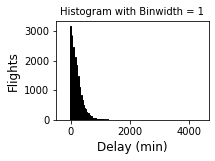

<Figure size 1440x720 with 0 Axes>

In [52]:
for i, binwidth in enumerate([1]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(training_data['SALES_UNITS'], bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 10)
    ax.set_xlabel('Delay (min)', size = 12)
    ax.set_ylabel('Flights', size= 12)

plt.figure(figsize=(20,10))
plt.tight_layout()
plt.show()

<BarContainer object of 4 artists>

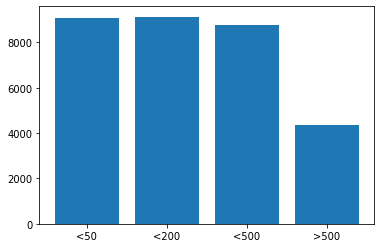

In [59]:
sales_dict = {"<50":0, "<200":0,"<500":0, ">500": 0}
l = training_data.shape[0]

for i in range(l):
    s = training_data.iloc[i,0]
    if s < 75:
        sales_dict["<50"] += 1
    elif s>=50 and s < 200:
        sales_dict["<200"] += 1
    elif s>=200 and s < 400:
        sales_dict["<500"] += 1
    else:
        sales_dict[">500"] += 1
        
plt.bar(sales_dict.keys(),sales_dict.values())

In [81]:
training_data.head()

,SALES_UNITS,DATE_VALID_STD,SCRUB_STORE_NO,TIME_DIM_KEY,DOY_STD,AVG_TEMPERATURE_AIR_2M_F,AVG_TEMPERATURE_WETBULB_2M_F,AVG_TEMPERATURE_DEWPOINT_2M_F,AVG_TEMPERATURE_FEELSLIKE_2M_F,AVG_HUMIDITY_RELATIVE_2M_PCT,...,AVG_PRESSURE_MEAN_SEA_LEVEL_MB,AVG_WIND_SPEED_10M_MPH,AVG_WIND_DIRECTION_10M_DEG,AVG_WIND_DIRECTION_80M_DEG,AVG_WIND_DIRECTION_100M_DEG,TOT_PRECIPITATION_IN,TOT_SNOWFALL_IN,AVG_CLOUD_COVER_TOT_PCT,AVG_RADIATION_SOLAR_TOTAL_WPM2,TOT_RADIATION_SOLAR_TOTAL_WPM2
0,759,2016-01-02,1,20160102,2,4.0,3.4,2.8,2.7,-4.0,...,-3.9,2.3,2,-5,-6,-0.12,-0.88,-30,-14.9,-356.6
1,486,2016-01-03,1,20160103,3,3.0,2.2,0.9,2.4,-7.0,...,1.6,0.9,80,72,73,-0.12,-0.76,7,1.9,46.3
2,326,2016-01-04,1,20160104,4,-6.6,-6.9,-8.6,-6.2,-7.0,...,13.6,-2.2,-224,-231,-229,-0.12,-0.75,-37,45.1,1083.9
3,395,2016-01-05,1,20160105,5,-6.5,-6.5,-6.6,-8.8,-1.4,...,13.6,0.6,-79,-78,-76,-0.12,-0.87,-6,4.1,97.2
4,478,2016-01-06,1,20160106,6,4.4,3.7,2.9,4.9,-5.0,...,6.8,-0.7,-65,-73,-72,-0.13,-0.88,-24,31.0,745.4


In [76]:
store = 1

In [88]:
store_data = training_data.copy()
store_data = store_data[store_data["SCRUB_STORE_NO"] == store]
l = temp.shape[0]
print(l)

min_date = store_data["TIME_DIM_KEY"].min()
vals = list()

for i in range(l):
    datestamp = store_data.iloc[i,3]
    time_idx = datestamp - min_date + 1
    vals.append(time_idx)

store_data["time_idx"] = vals

1636


In [92]:
training_data["DATE_VALID_STD"]

ValueError: Of the four parameters: start, end, periods, and freq, exactly three must be specified